In [54]:
import matplotlib.pyplot as plt
import numpy as np

In [157]:

class Polynomial:
    def __init__(self, elements):
        self.elements = list(elements)
        self.degree = len(self.elements) - 1
    
    def __str__(self):
        return "Coefficients of the polynomial are:\n" + ' '.join(map(str, self.elements))
    
    def __add__(self, other):
        self.elements += [0] * (len(other.elements) - len(self.elements))
        other.elements += [0] * (len(self.elements) - len(other.elements))
        
        result_elements = [x + y for x, y in zip(self.elements, other.elements)]
        return Polynomial(result_elements)
    
    def __sub__(self, other):
        self.elements += [0] * (len(other.elements) - len(self.elements))
        other.elements += [0] * (len(self.elements) - len(other.elements))
        
        result_elements = [x - y for x, y in zip(self.elements, other.elements)]
        return Polynomial(result_elements)
    
    def __mul__(self, scalar):

        if type(scalar) == Polynomial:
            result_elements = [0] * (len(self.elements) + len(scalar.elements) - 1)
            for i, x in enumerate(self.elements):
                for j, y in enumerate(scalar.elements):
                    result_elements[i + j] += x * y
        else:
            result_elements = [x * scalar for x in self.elements]
            
        return Polynomial(result_elements)
    
    def __rmul__(self, scalar):
        return self.__mul__(scalar)
    
    def __getitem__(self, x):
        result = 0
        for i, coeff in enumerate(self.elements):
            result += coeff * (x ** i)
        return result

    
    def show(self, a, b):
        # Generate x values in the interval [a, b]
        x = np.linspace(a, b, 100)

        # Evaluate the polynomial for each x value
        y = [self[x_val] for x_val in x]

        def generate_polynomial(self):

            result = ""
            op = ""
            for i, coeff in enumerate(self.elements):
                if coeff == 0:
                    continue
                op = " - " if coeff < 0 else " + "
                result += (op if result != "" else "") + (str(coeff) if abs(coeff) != 1 or i == 0 else "") + ("x" + ("^" if i != 1 else "") + (str(i) if i != 1 else "") if i != 0 else "") 
            return result
    

        p_x = generate_polynomial(self) 
        if p_x == "":
            p_x = "0"

        # Plot the polynomial
        plt.plot(x, y)
        plt.xlabel('$x$')
        plt.ylabel('$P(x)$')
        plt.title(f"Plot é of the polynomial ${p_x}$")
        plt.grid(True)
        plt.show()


    def shownew(self, a, b, points, flag = 1):

        #   For interpolation
        x = np.linspace(a,b,num=100)

        if flag == 1:
            y = np.polyval(np.flip(self.elements),x)
            method='matrix method'

        else:
            y = np.polyval(self.elements,x)
            method='Lagrange polynomial'

        plt.plot(x,y)
        plt.grid()
        plt.xlabel('x')
        plt.ylabel('ƒ(x)')
        plt.title('Polynomial interpolation using '+ method)
        x,y = zip(*points)
        plt.scatter(x, y, color='r')
        plt.show()
        
    def fitViaMatrixMethod(self,points):
        A = np.zeros((len(points),len(points)))
        b = np.zeros(len(points))

        #Fill matrix A and vector b
        for i,(x,y) in enumerate(points):
            for j in range(len(points)):
                A[i][j] = x**j
            b[i] = y

        #   Solve the linear system to obtain the coefficients
        self.elements = np.linalg.solve(A,b)
        p = Polynomial(self.elements)

        p.shownew(min([p[0] for p in points]),max([p[0] for p in points]),points)
        
    def fitViaLagrangePoly(self,points):
        p = Polynomial([0.0])

        for i in range(len(points)):
            #   Initialize the Lagrange basis polynomial lgrng with the y-coordinate of the ith point
            lgrng = Polynomial([points[i][1]])
            for j in range(len(points)):
                if i!=j:
                  xi,xj = points[i][0],points[j][0]
                  lgrng = lgrng*Polynomial([1/(xi-xj),-xj/(xi-xj)])

            #Update the polyomial p
            p = p+lgrng
            
        p.shownew(min([p[0] for p in points]),max([p[0] for p in points]),points,0)


Coefficients of the polynomial are:
4 4 4
Coefficients of the polynomial are:
-1 0 0 1
P(2) =  17


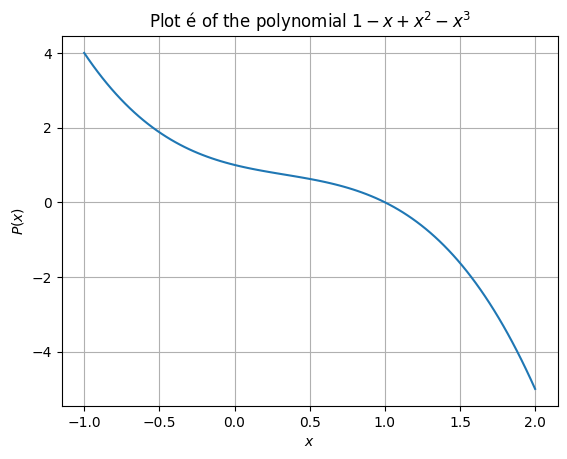

In [164]:
p1 = Polynomial([1, 2, 3])
p2 = Polynomial([3, 2, 1])
p3 = p1 + p2
print(p3)
p1 = Polynomial([-1, 1])
p2 = Polynomial([1, 1, 1])
p3 = p1 * p2
print(p3)
p = Polynomial([1, 2, 3])
print("P(2) = ", p[2])
p = Polynomial([1, -1, 1, -1])
p.show(-1, 2)

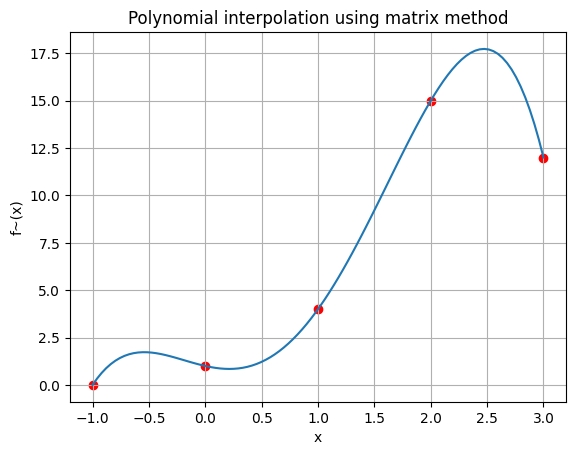

In [155]:
p = Polynomial([])
p.fitViaMatrixMethod([(1, 4), (0, 1), (-1, 0), (2, 15), (3, 12)])

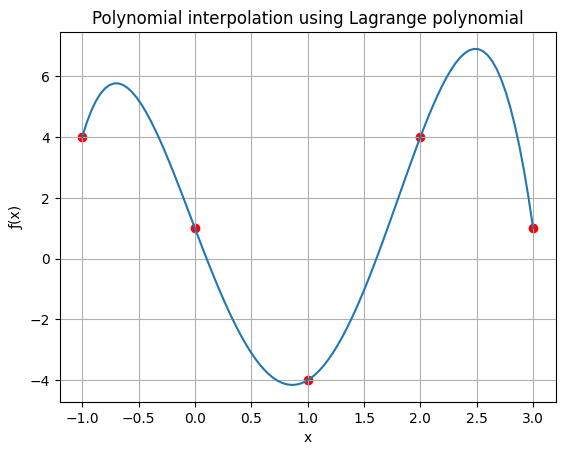

In [158]:
p = Polynomial([])
p.fitViaLagrangePoly([(1,-4), (0,1), (-1, 4), (2, 4), (3,1)])